<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/Supervised_Learning_Boston_Housing_Regression_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Data

## Regression

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import Boston Dataset in datasets of sklearn
load_boston = datasets.load_boston()
load_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
boston = pd.DataFrame(load_boston.data,columns=load_boston.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Target variable
y = load_boston.target
print(y.shape)
type(y)

(506,)


numpy.ndarray

In [ ]:
from sklearn.linear_model import LinearRegression

# We only want to predict house value from a single feature: Number of rooms
X_rooms = boston['RM'].values

reg = LinearRegression()
reg.fit(X_rooms,y)



If we are calculating a regression with ony one feature, we need to reshape:

Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

So we should reshape


In [ ]:
# Reshaping:
y = y.reshape(-1,1)
# .values to convert into a numpy array. Series DataFrame doesn't have a reshape method.
X_rooms = X_rooms.reshape(-1,1)

reg = LinearRegression()
reg.fit(X_rooms,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

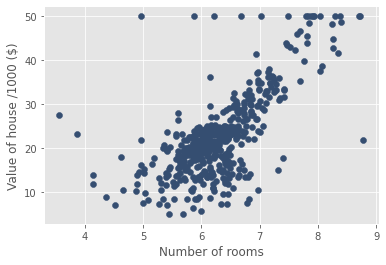

In [ ]:
# plot house value as a function of number of rooms

plt.scatter(X_rooms,y,color='#354e71')
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

# Plot scatter plot with Linear Regression

For only one feature

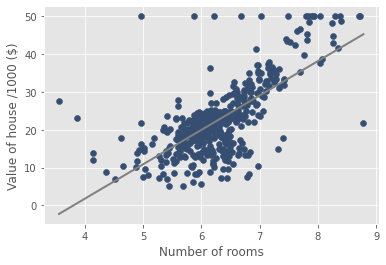

In [ ]:
# Plot scatter plot with Linear Regression

prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)
prediction_rooms = reg.predict(prediction_space)

plt.scatter(X_rooms,y,color='#354e71')
plt.plot(prediction_space,prediction_rooms, color='#808080',linewidth= 2)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

# Making a Heatmap with seaborn

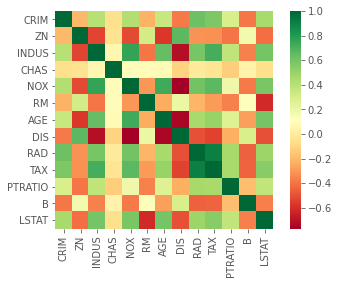

In [ ]:
# Making a Heatmap with seaborn
sns.heatmap(boston.corr(), square=True, cmap='RdYlGn')

# Regression mechanics

## Loss Function
How do we choose parameters for the linear regression y= a + b1*x1 +... + bn*xn?

We define an error function for any given line and choose the one that minimizes that error.

The distance between each data point and a line (vertical distance) is called **residual**.

Our loss function is the sum of squares of residuals and it's called Ordinary Least squares (OLS)

Minimizing sum of squares of the residuals we will find de optimal line.




In [ ]:
# Linear regression on all features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = boston

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train,y_train)

y_pred = reg_all.predict(X_test)



# Scoring for linear regression is R2

Calculates de amount of variance of the target variable that is predicted from the feature variables.

In [ ]:
# Scoring R2

reg_all.score(X_test,y_test)


0.7112260057484974

# K-fold Cross-Validation in Scikit-learn

Model performance is dependent on way the data is split

R2 would not be representative of the model's ability to generalize (predict to unseen data)

To combat this depence in split we use ** k-fold cross-validation**.

More K's more computation needed.

it computes 5 R2 metrics **(R2 is the default metric of cross_val_score of sklearn)**



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# Let's make a 5-fold Cross Validation
cv_results = cross_val_score(reg,X,y,cv=5)

print(cv_results)
print(cv_results.mean())

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
0.35327592439588484


# Regularization: Regularized regression

Linear regression works minimizing the loss function choosing a coefficient for each feature variable.

Regularization is to penalize large coefficients. Because large coefficients can lead to overfitting.




## Ridge Regression - L2 regularization
First type of regularized regression is called Ridge regression.

Ridge is equal to OLS function (Ordinary Least squares) plus a coefficient **alpha** that multiplies the function. **alpha is a hyperparameter**, so it's important to process a hyperparameter tuning.

Alpha controls model complexity. A low alpha can lead to overfitting, a higher alpha simplifies the model (but can lead to underfitting, where alpha penalizes higher coefficients)

In [ ]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# normalize True ensures all our variables are on the same scale
ridge = Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)

ridge_pred[:5]


array([[27.97023765],
       [35.38307715],
       [16.82607459],
       [25.14515158],
       [18.74860504]])

## Ridge Regression with Cross-Validation and alpha tuning



For each alpha value we are performing a 10-fold Cross-Validation and computing the mean of R2 for every alpha.


### Computing R2 for each alpha

In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

ridge_scores[:5]

[0.2027954621122284,
 0.20285048894245175,
 0.20291685957929725,
 0.20299690377963855,
 0.2030934257989649]

### Plotting with function: x= Alpha, y= CV Score +/- Std Error

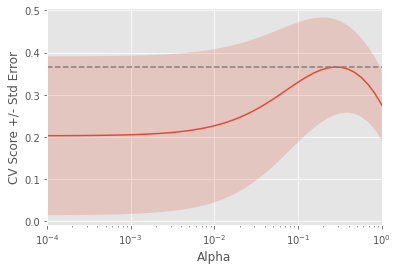

In [ ]:
# Code from DataCamp
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

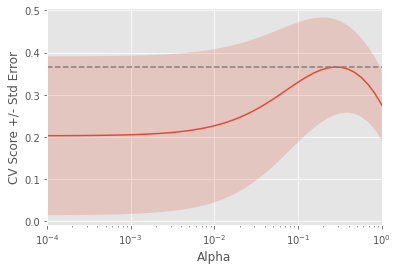

In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

## Lasso Regression -  L1 regularization

Code for lasso regression is identical to ridge regression

For building regression models Ridge regression should be my first choice.

The importance of Lasso regression comes from the selection of important features of the dataset.

Tends to shrink coefficients of less important features to value near zero.

Coefficients not shrunk to zero are important for Lasso Coeficient.

## Importance of Lasso Regression for feature regression and comunication

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469455, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795837,  0.        , -0.42817439])

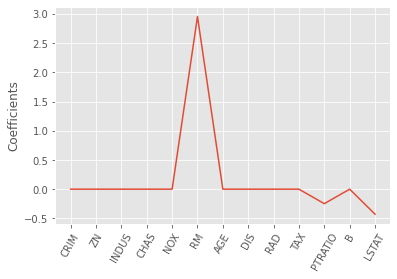

In [ ]:
#Calculate Lasso regression for feature selection

# Which features/factors are important predictors?

from sklearn.linear_model import Lasso

name_features = boston.columns

lasso = Lasso(alpha=0.1,normalize=True)

lasso_coef = lasso.fit(X,y).coef_
display(lasso_coef)

plt.plot(name_features,lasso_coef)
plt.xticks(rotation=60)
plt.ylabel('Coefficients')
plt.show()


## LogisticRegression + GridSearchCV for C (For classification)

In [ ]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

## Hold-Out set ElasticNet with GridSearchCV

Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

a∗L1+b∗L2

In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

In [ ]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3574.2674952346542, tolerance: 2.138958896694215
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3675.4850294526095, tolerance: 2.106010169421487
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3483.8291808691874, tolerance: 1.9782090743801652
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3883.857

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.6637648307263886
Tuned ElasticNet MSE: 25.53490371495736


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4552.425328290939, tolerance: 2.703569412541254
  positive)
